In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [3]:
record = pd.read_csv('reference/From Mr.Zeng/RL-for-RBG/record.txt', header=None, sep='[=:, \]]')
record = record[[13, 15, 21, 23]]
print(record[13][record[13]>record[21]].shape)
print(record[15][record[15]>record[23]].shape)

(146,)
(117,)


D:\anaconda3\envs\tf20\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


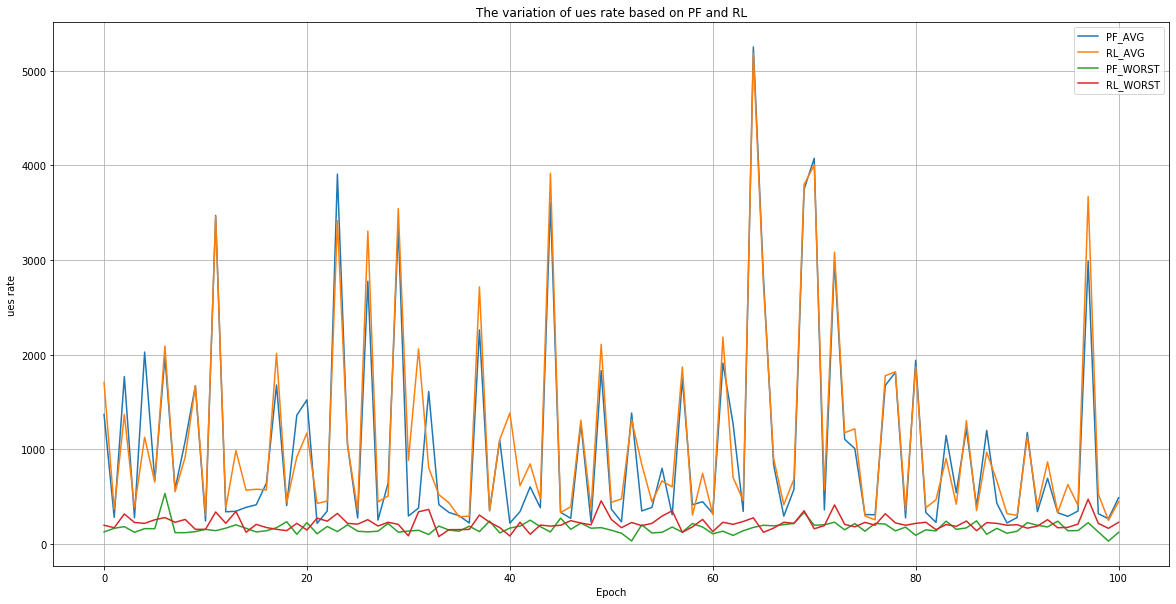

In [14]:
plt.figure(figsize=(20, 10))

plt.title('The variation of ues rate based on PF and RL')
plt.xlabel('Epoch')
plt.ylabel('ues rate')
plt.grid(True)
plt.plot(record[13], label='PF_AVG')
plt.plot(record[21], label='RL_AVG')
plt.plot(record[15], label='PF_WORST')
plt.plot(record[23], label='RL_WORST')
plt.legend()

plt.show()

# 数据分析

In [23]:
from simulator import load_av_ue_info
from simulator import AIRVIEW

In [25]:
av_ues_info = load_av_ue_info()
env = AIRVIEW()

In [18]:
for item in av_ues_info[0]:
    print(item)

buffer
rsrp
cqi
snr


In [15]:
snr = np.array(av_ues_info[0]['snr'])
snr.shape

(3900, 2)

In [20]:
for item in av_ues_info[0]['cqi']:
    print(item)

rb_cqi
passed_time


In [21]:
rb_cqi = np.array(av_ues_info[0]['cqi']['rb_cqi'])
rb_cqi.shape

(3900, 50)

In [22]:
passed_time = np.array(av_ues_info[0]['cqi']['passed_time'])
passed_time.shape

(3900,)

In [35]:
av_ues_idx = list(range(0, 5))
observation = env.reset(av_ues_info, av_ues_idx)
observation, reward, done, _ = env.step(np.random.randint(0, 5, 17))

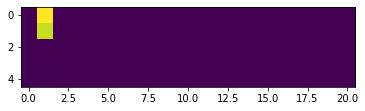

In [40]:
plt.imshow(observation)
plt.show()